STATISTICAL SUMMARY

Numerical Columns Summary:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232  

C:\Users\rosha\AppData\Local\Temp\ipykernel_15780\3366080738.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target, data=df, palette='pastel')
C:\Users\rosha\AppData\Local\Temp\ipykernel_15780\3366080738.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=most_corr_feature, data=df, palette='pastel')
C:\Users\rosha\AppData\Local\Temp\ipykernel_15780\3366080738.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y='BMI', data=df, palette='pastel')



Saved full analysis plot to diabetes_full_analysis.png

CATEGORICAL VARIABLES ANALYSIS
No non-numeric categorical columns found in this dataset.


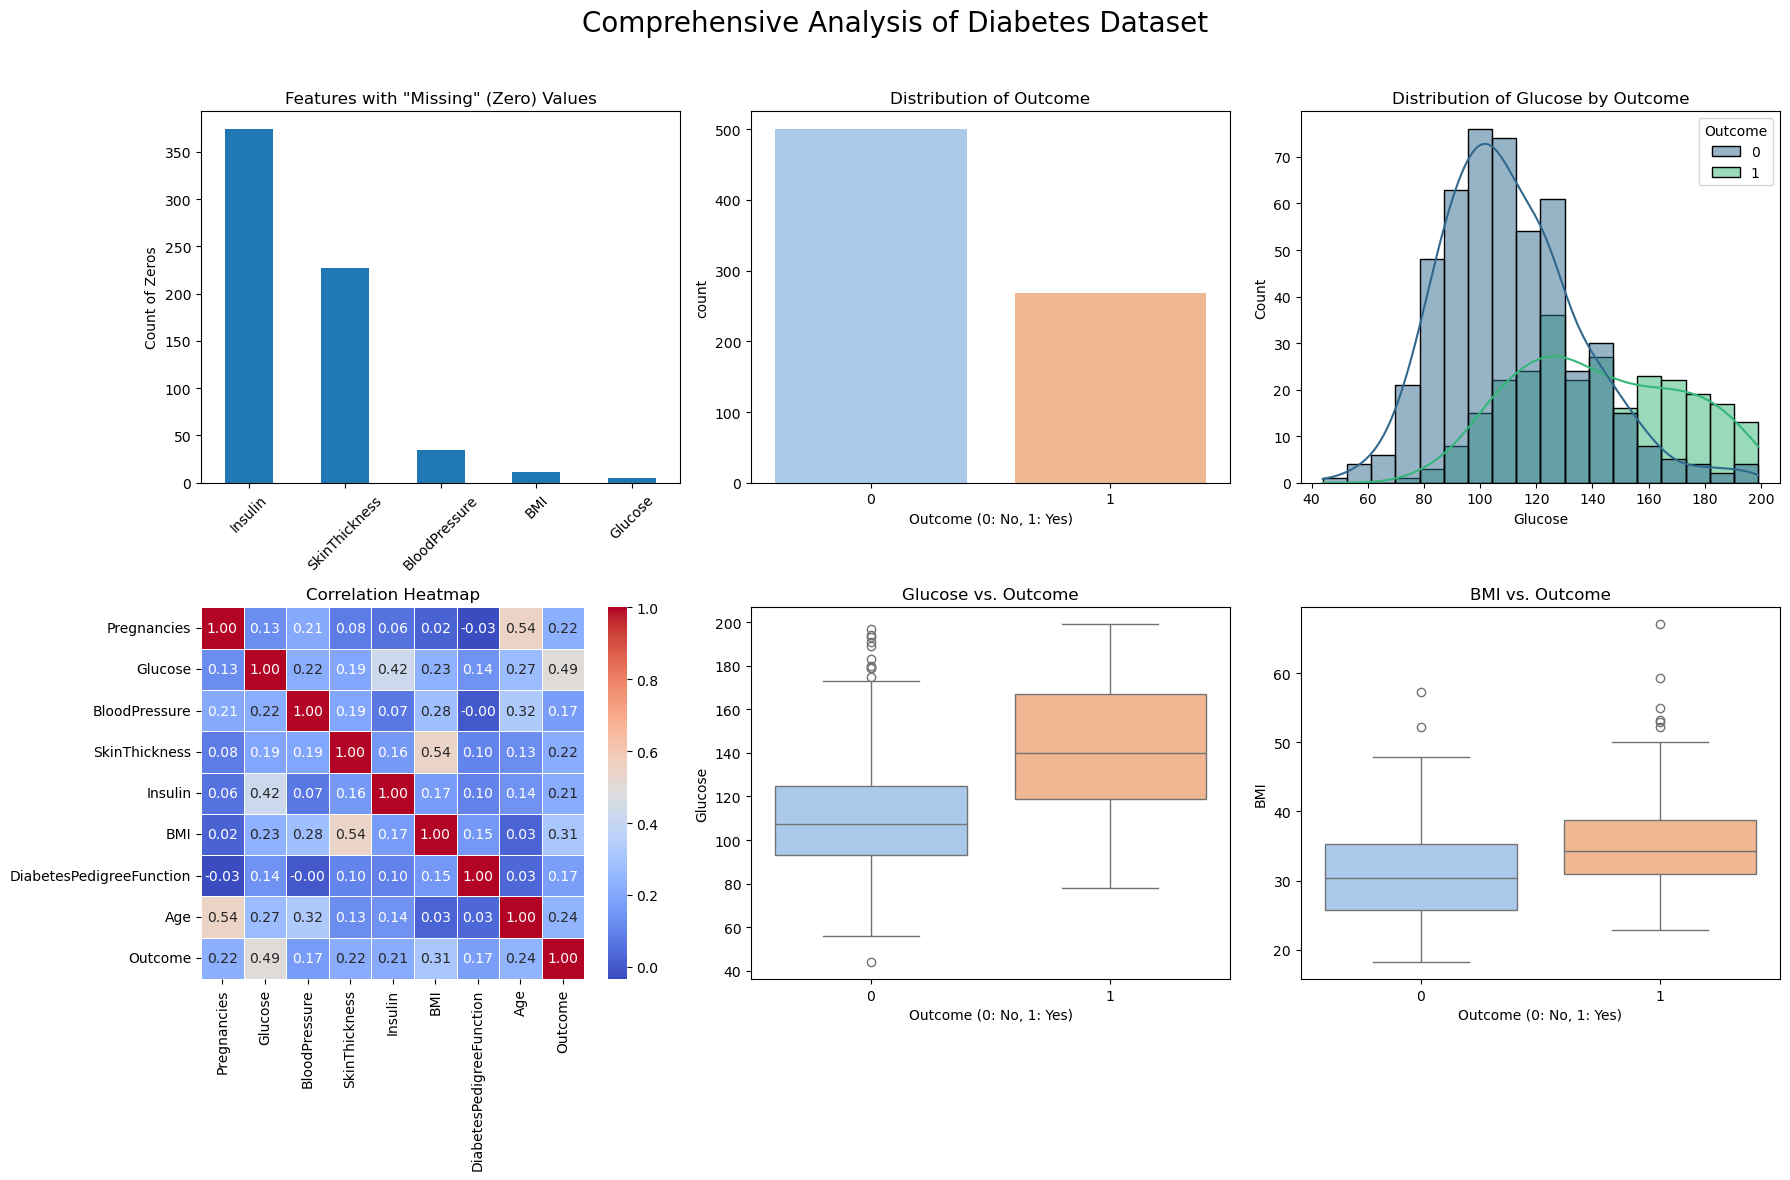

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load  the data set
df = pd.read_csv('diabetes.csv')

# --- STATISTICAL SUMMARY ---
print("STATISTICAL SUMMARY")
print("="*50)

# Descriptive statistics for numerical columns
print("\nNumerical Columns Summary:")
print(df.describe())

# Target variable analysis
target = 'Outcome'
print(f"\nTarget Variable ({target}) Analysis:")

print("Value Counts (0 = No Diabetes, 1 = Has Diabetes):")
print(df[target].value_counts())
print(f"Proportion with Diabetes: {df[target].mean():.2%}")


# --- CORRELATION ANALYSIS ---
print("\nCORRELATION ANALYSIS")
print("="*50)

# Calculate correlation with target variable
correlations = df.corr()[target].sort_values(ascending=False)
print("\nFeatures most correlated with Outcome:")
print(correlations.drop(target)) 


# --- Visualization ---
plt.figure(figsize=(18, 12))
plt.suptitle("Comprehensive Analysis of Diabetes Dataset", fontsize=20)

# 1. Missing values visualization (BEFORE cleaning)
plt.subplot(2, 3, 1)
# In this dataset, '0' represents missing data in these columns
missing_data_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
missing_counts = (df[missing_data_cols] == 0).sum()
missing_counts = missing_counts[missing_counts > 0] 
if not missing_counts.empty:
    missing_counts.sort_values(ascending=False).plot(kind='bar')
    plt.title('Features with "Missing" (Zero) Values')
    plt.ylabel('Count of Zeros')
    plt.xticks(rotation=45)
else:
    plt.text(0.5, 0.5, 'No Missing (Zero) Values Found', ha='center')
    plt.title('Missing Values Check')


# --- Data Cleaning Step ---
df[missing_data_cols] = df[missing_data_cols].replace(0, np.nan)
df.fillna(df.mean(), inplace=True)


# 2. Target variable distribution
plt.subplot(2, 3, 2)
sns.countplot(x=target, data=df, palette='pastel')
plt.title('Distribution of Outcome')
plt.xlabel('Outcome (0: No, 1: Yes)')


# 3. Distribution of the most correlated feature (Glucose)
most_corr_feature = correlations.index[1]
plt.subplot(2, 3, 3)
sns.histplot(data=df, x=most_corr_feature, hue=target, kde=True, palette='viridis')
plt.title(f'Distribution of {most_corr_feature} by Outcome')


# 4. Correlation heatmap
plt.subplot(2, 3, 4)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')


# 5. Box plot of most correlated feature vs. target
plt.subplot(2, 3, 5)
sns.boxplot(x=target, y=most_corr_feature, data=df, palette='pastel')
plt.title(f'{most_corr_feature} vs. Outcome')
plt.xlabel('Outcome (0: No, 1: Yes)')


# 6. Box plot for highly correlated feature (BMI)
plt.subplot(2, 3, 6)
sns.boxplot(x=target, y='BMI', data=df, palette='pastel')
plt.title('BMI vs. Outcome')
plt.xlabel('Outcome (0: No, 1: Yes)')


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('diabetes_full_analysis.png')
print("\nSaved full analysis plot to diabetes_full_analysis.png")


# --- CATEGORICAL VARIABLES ANALYSIS ---
print("\nCATEGORICAL VARIABLES ANALYSIS")
print("="*50)
categorical_cols = df.select_dtypes(include=['object']).columns
if len(categorical_cols) == 0:
    print("No non-numeric categorical columns found in this dataset.")
else:
    for col in categorical_cols:
        print(f"\nAnalysis for {col}:")
        print(df[col].value_counts())